In [1]:
import re
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO, Entrez
import py3Dmol

from dotenv import load_dotenv
env_file = '/home/yuan/bio/bio_omics/src/pipelines/.env'
load_dotenv(dotenv_path = env_file)

%load_ext autoreload
%autoreload 2

src_dir = os.path.dirname(os.getcwd())
print('src direcotry is ', src_dir)
bioomics_dir = '/home/yuan/bio/bio_omics/src'
for _dir in (src_dir, bioomics_dir):
    if _dir not in sys.path:
        sys.path.append(_dir)
print(sys.path)

from bioomics import QueryComplex
from plot_pdb import PlotPdb

src direcotry is  /home/yuan/bio/predict_antibody
['/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python310.zip', '/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python3.10', '/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python3.10/lib-dynload', '', '/home/yuan/bio/localcolabfold/localcolabfold/colabfold-conda/lib/python3.10/site-packages', '/home/yuan/bio/predict_antibody', '/home/yuan/bio/bio_omics/src']


In [2]:
query = "select * from view_antibody;"
df = QueryComplex(True).list_data(query, True)
df['release_date'] = pd.to_datetime(df['release_date'])

print(len(df))
df.head()

31529


,allele_name,specie,gene_name,gene_family,chain_type,pdb_id,chain_id,model_no,chain_no,pro_id,chain_seq,pro_len,release_date,structure_method,resolution,avg_bfactor,relative_faa,relative_pdb,pdb_group
0,IGKV8-21*01,Mus_musculus,IGKV8-21,IGKV8,K,3IJH,3IJH_0_A_0,0,A,143006,IVMTQSPSSLAVSAGEKVTMSCKSSQSLLNSRTRKNYLAWYQQKPG...,217,2009-10-06,x-ray diffraction,2.10,27.2235,meta_chain_faa/3I/3IJH/3IJH_0_A_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_A_0.pdb,0.0
1,IGHV7-3*02,Mus_musculus,IGHV7-3,IGHV7,H,3IJH,3IJH_0_B_0,0,B,148148,EVMLVESGGGLVQPGNSLRLSCATSGFTFTDYYMSWVRQPPGKALE...,221,2009-10-06,x-ray diffraction,2.10,29.0730,meta_chain_faa/3I/3IJH/3IJH_0_B_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_B_0.pdb,0.0
2,IGKV8-21*01,Mus_musculus,IGKV8-21,IGKV8,K,3IJH,3IJH_0_C_0,0,C,143006,IVMTQSPSSLAVSAGEKVTMSCKSSQSLLNSRTRKNYLAWYQQKPG...,217,2009-10-06,x-ray diffraction,2.10,34.2494,meta_chain_faa/3I/3IJH/3IJH_0_C_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_C_0.pdb,0.0
3,IGHV7-3*02,Mus_musculus,IGHV7-3,IGHV7,H,3IJH,3IJH_0_D_0,0,D,148148,EVMLVESGGGLVQPGNSLRLSCATSGFTFTDYYMSWVRQPPGKALE...,221,2009-10-06,x-ray diffraction,2.10,30.9271,meta_chain_faa/3I/3IJH/3IJH_0_D_0.faa,meta_chain_pdb/3I/3IJH/3IJH_0_D_0.pdb,0.0
4,IGKV1-21*01,Macaca_mulatta,IGKV1-21,IGKV1,K,9IJS,9IJS_0_H_0,0,H,152834,VQLVESGGGLVQPGGSLRLSCAASGFNVYSSSIHWVRQAPGKGLEW...,225,2025-09-03,electron microscopy,3.64,119.2310,meta_chain_faa/9I/9IJS/9IJS_0_H_0.faa,meta_chain_pdb/9I/9IJS/9IJS_0_H_0.pdb,0.0


/home/yuan/bio/predict_antibody/src/plot_pdb.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=args.get('rotation', 45), ha='right')


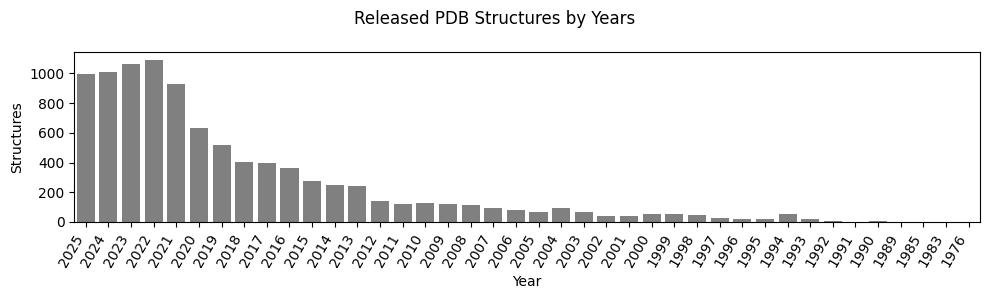

In [3]:
args = {'figsize': (10,3), 'rotation': 60}
fig = PlotPdb.bar_release(df, args)

## structure method

(<Figure size 600x300 with 1 Axes>,
 <Axes: title={'center': '9647 PDB'}, ylabel='Number of PDB'>)

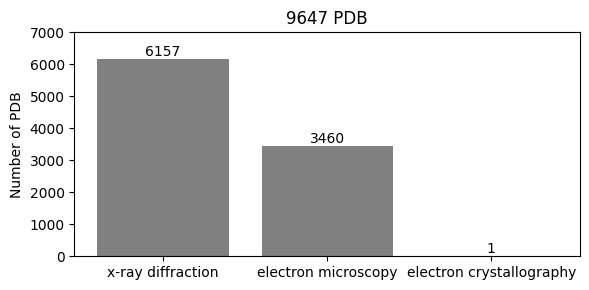

In [4]:
sdf = df[['pdb_id', 'structure_method']].drop_duplicates()
sdf['structure_method'].value_counts()

PlotPdb.bar_count_pdb(sdf, ymax=7000)

## resolution

/home/yuan/bio/predict_antibody/src/plot_pdb.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Distribution of Resolution'}, ylabel='Resolution, log-$\\AA$'>)

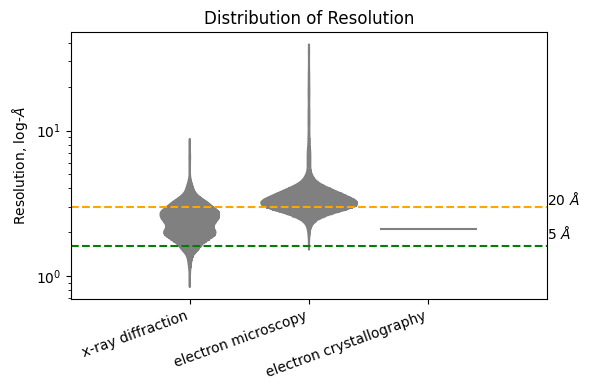

In [5]:
sdf = df[['pdb_id', 'resolution', 'structure_method']].drop_duplicates()
PlotPdb.violin_resolution(sdf)

(<Figure size 800x400 with 1 Axes>,
 <Axes: title={'center': 'Resolution Selection from 9617 PDB data'}, xlabel='Resolution, $\\AA$', ylabel='Number of PDB'>)

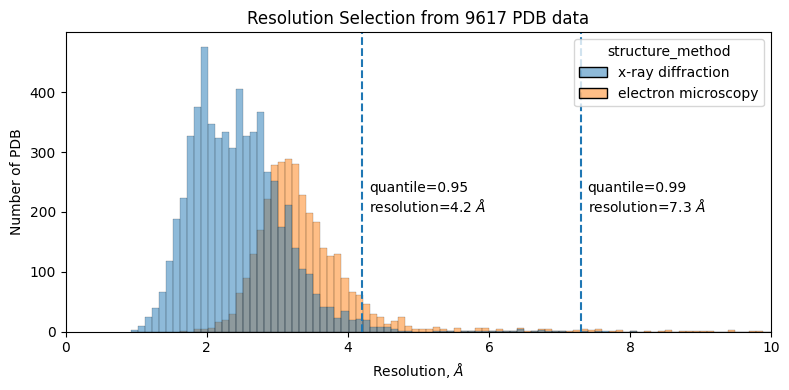

In [6]:
PlotPdb.hist_resolution(sdf)

## complex

      index  count
0   monomer   4004
1     dimer   2229
2    trimer   1696
3  tetramer    735
4  pentamer    450
5  heptamer    218
6     other    315


(<Figure size 700x400 with 1 Axes>,
 <Axes: title={'center': 'Protein Complex in 9647 PDB data'}>)

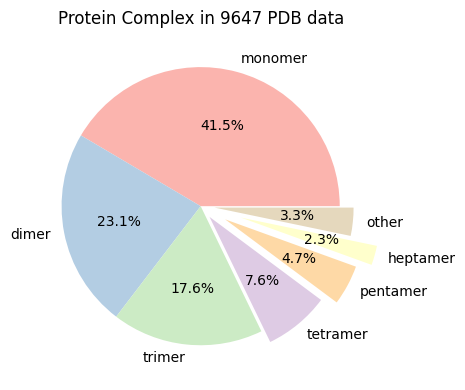

In [7]:
args = {'figsize': (7,4), 'startangle':0,}
PlotPdb.pie_complex(df, args)

## B-factor

In [8]:
xdf = df[df['structure_method'].notna()]
xdf = xdf[xdf['structure_method'].str.contains('x-ray')]
xdf = xdf[['chain_id', 'resolution', 'avg_bfactor']]
xdf = xdf.drop_duplicates()
xdf.shape

(20213, 3)

Quantile of 0.95, B-factor = 149.2308
Quantile of 0.95, resolution = 3.74


(<Figure size 800x400 with 1 Axes>,
 <Axes: title={'center': 'PDB: 20213, Method: X-RAY Diffraction, quantile=0.95'}, xlabel='Average B-factor', ylabel='Resolution, $\\AA$'>)

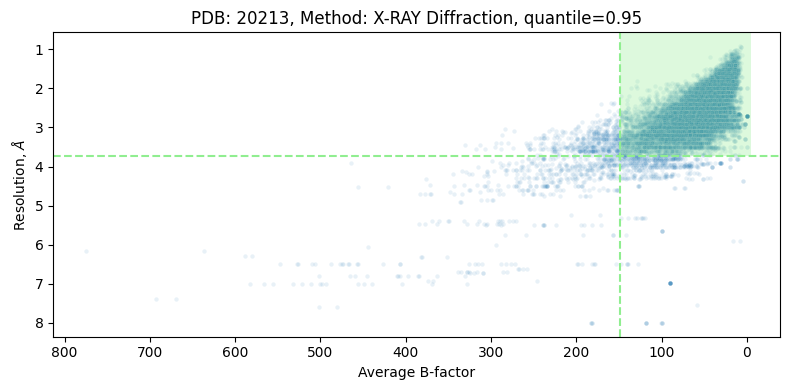

In [9]:
PlotPdb.dot_bfactor(xdf, ', Method: X-RAY Diffraction', quantile=.95)

Quantile of 0.95, B-factor = 149.2308
Quantile of 0.95, resolution = 3.74


(<Figure size 800x400 with 1 Axes>,
 <Axes: title={'center': 'PDB: 20213, Method: Electron Microscopy, quantile=0.95'}, xlabel='Average B-factor', ylabel='Resolution, $\\AA$'>)

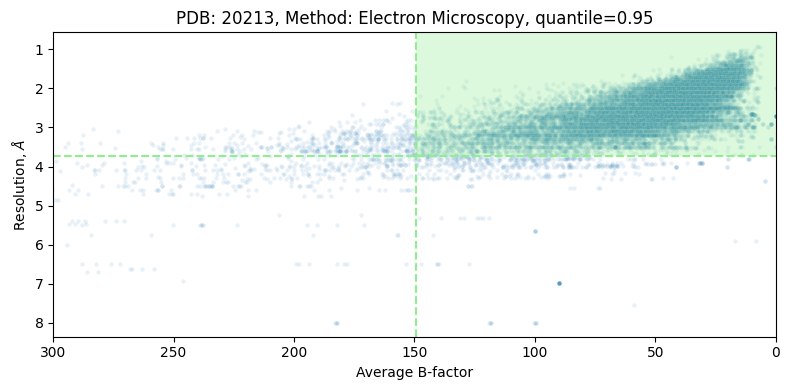

In [10]:
PlotPdb.dot_bfactor(xdf, ', Method: Electron Microscopy', .95, xlim_max=300)